In [3]:
import pandas as pd
import glob

# Find all CSV files with suffix 'test'
csv_files = glob.glob('/home/ihossain/ISMAIL/SSL-malware/results_ours/*[0-9]_test.csv')

# Read each CSV file into a DataFrame and store them in a list
dataframes = [pd.read_csv(file) for file in csv_files]

# Optionally, you can concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)


In [6]:
combined_df.head()

,date\tTPR\tTNR\tFPR\tFNR\tACC\tPREC\tF1
0,2013-07\t0.8300\t0.9947\t0.0053\t0.1700\t0.978...
1,2013-08\t0.7727\t0.9923\t0.0077\t0.2273\t0.970...
2,2013-09\t0.7740\t0.9931\t0.0069\t0.2260\t0.971...
3,2013-10\t0.7194\t0.9924\t0.0076\t0.2806\t0.965...
4,2013-11\t0.7051\t0.9951\t0.0049\t0.2949\t0.966...


In [1]:
import pandas as pd
import glob
combined_df = pd.read_csv("/home/ihossain/ISMAIL/SSL-malware/results_ours/gen_apigraph_cnt200_03.11-12.44.16_test.csv")

In [ ]:
# Split the single column into multiple columns using tab as the delimiter
combined_df = combined_df['date\tTPR\tTNR\tFPR\tFNR\tACC\tPREC\tF1'].str.split('\t', expand=True)

# Rename the columns
combined_df.columns = ['date', 'TPR', 'TNR', 'FPR', 'FNR', 'ACC', 'PREC', 'F1']


,date,TPR,TNR,FPR,FNR,ACC,PREC,F1
0,2013-01,0.9600,0.9944,0.0056,0.0400,0.9910,0.9505,0.9552
1,2013-02,0.9094,0.9829,0.0171,0.0906,0.9755,0.8559,0.8818
2,2013-03,0.8101,0.9967,0.0033,0.1899,0.9780,0.9647,0.8806
3,2013-04,0.8689,0.9986,0.0014,0.1311,0.9856,0.9854,0.9235
4,2013-05,0.8278,0.9961,0.0039,0.1722,0.9794,0.9591,0.8886


In [3]:
# Display the updated DataFrame
combined_df.head(10)

,date,TPR,TNR,FPR,FNR,ACC,PREC,F1
0,2013-01,0.9600,0.9944,0.0056,0.0400,0.9910,0.9505,0.9552
1,2013-02,0.9094,0.9829,0.0171,0.0906,0.9755,0.8559,0.8818
2,2013-03,0.8101,0.9967,0.0033,0.1899,0.9780,0.9647,0.8806
3,2013-04,0.8689,0.9986,0.0014,0.1311,0.9856,0.9854,0.9235
4,2013-05,0.8278,0.9961,0.0039,0.1722,0.9794,0.9591,0.8886
5,2013-06,0.8550,0.9954,0.0046,0.1450,0.9814,0.9538,0.9017
6,2013-07,0.8775,0.9938,0.0062,0.1225,0.9821,0.9407,0.9080
7,2013-08,0.8554,0.9923,0.0077,0.1446,0.9787,0.9241,0.8884
8,2013-09,0.8920,0.9884,0.0116,0.1080,0.9787,0.8956,0.8938
9,2013-10,0.8297,0.9891,0.0109,0.1703,0.9731,0.8942,0.8607


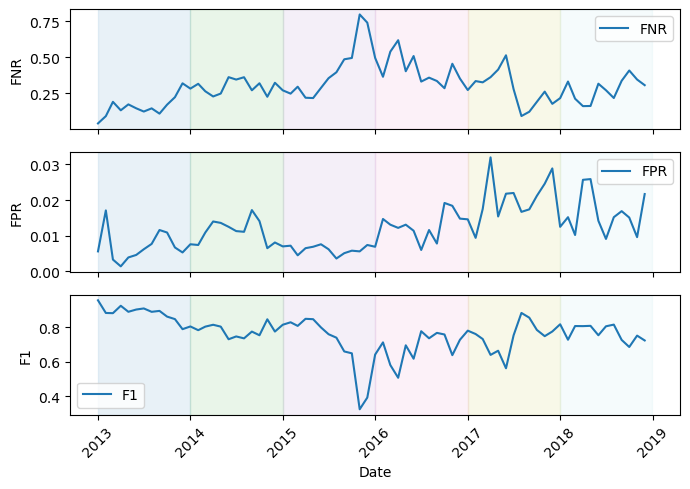

In [4]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm

# Convert columns to numeric, except for the date column
for col in combined_df.columns[1:]:
    combined_df[col] = pd.to_numeric(combined_df[col])

# Convert the 'date' column to datetime
combined_df['date'] = pd.to_datetime(combined_df['date'], format='%Y-%m')

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Columns to plot
columns_to_plot = ['FNR', 'FPR', 'F1']

# Get unique years and create a color map
years = combined_df['date'].dt.year.unique()
colors = cm.get_cmap('tab20', len(years))

# Plot each specified column against the date column
for i, col in enumerate(columns_to_plot):
    axs[i].plot(combined_df['date'], combined_df[col], label=col)
    axs[i].set_ylabel(col)
    axs[i].legend()

    # Highlight the portion from the first month to the last month of each year with different colors
    for j, year in enumerate(years):
        start_date = f'{year}-01-01'
        end_date = f'{year}-12-31'
        axs[i].axvspan(start_date, end_date, color=colors(j), alpha=0.1)

# Set the x-axis label for the last subplot
axs[-1].set_xlabel('Date')

# Format the x-axis to show only the years
axs[-1].xaxis.set_major_locator(mdates.YearLocator())
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()